In [49]:
import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [51]:
df_train = pd.read_csv('/Users/pandaa/Downloads/train_v9rqX0R.csv')
df_test = pd.read_csv('/Users/pandaa/Downloads/test_AbJTz2l.csv')

In [52]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [54]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [55]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [56]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [48]:
df_train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [13]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [15]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<b> In pandas, Numerical and Categorical features are to be treated differently. </b>

In [57]:
df_train["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", 'reg':'Regular'}, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

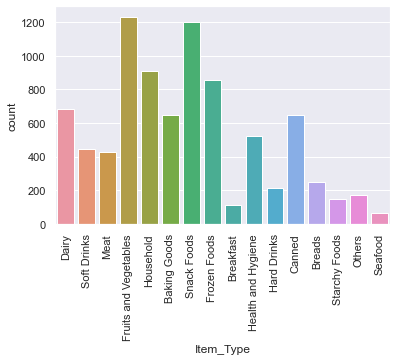

In [7]:

sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

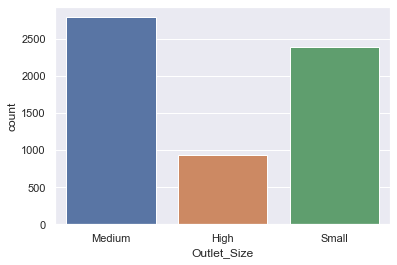

In [8]:
sns.countplot(df_train.Outlet_Size)

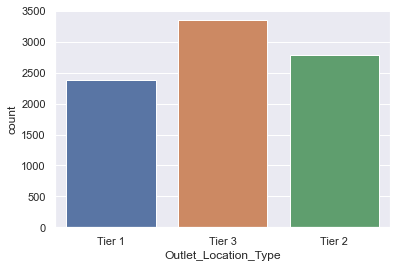

In [9]:
sns.countplot(df_train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

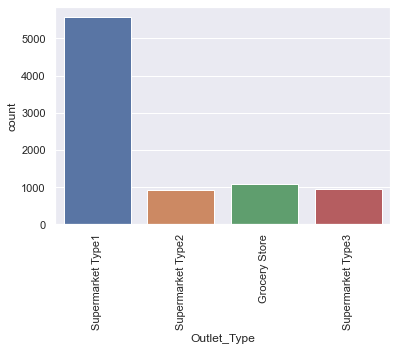

In [10]:
sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation=90)

In [58]:
# filling missing values
# fill weight by mean item weight
df_train.Item_Weight = df_train.groupby('Item_Type')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
df_train.Item_Weight = df_train.Item_Weight.fillna(df_train.Item_Weight.mean())

# test data
df_test["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", 'reg':'Regular'}, inplace=True)
df_test.Item_Weight = df_test.groupby('Item_Type')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))
df_test.Item_Weight = df_test.Item_Weight.fillna(df_test.Item_Weight.mean())

In [59]:
from scipy.stats import mode
outlet_size_mode = df_train.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc= lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [60]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
df_train['Outlet_Size'] = df_train[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
df_test['Outlet_Size'] = df_test[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)

In [61]:
df_train = df_train.drop('Item_Identifier',axis = 1)
df_test = df_test.drop('Item_Identifier',axis = 1)

In [62]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [63]:
df1_train =pd.get_dummies(df_train.Outlet_Establishment_Year)
df1_test= pd.get_dummies(df_test.Outlet_Establishment_Year)

In [64]:
df2_train = df_train.drop(['Outlet_Establishment_Year'], axis = 1)
df2_test = df_test.drop(['Outlet_Establishment_Year'], axis = 1)

In [65]:
X_train = pd.concat([df2_train,df1_train], axis=1)
X_test = pd.concat([df2_test,df1_test], axis=1)

In [67]:
y = df_train.iloc[:,3] 
X_train = X_train.drop(['Item_Outlet_Sales'], axis=1)

In [70]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Type_Supermarket Type3,1985,1987,1997,1998,1999,2002,2004,2007,2009
0,9.300,0.016047,249.8092,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.920,0.019278,48.2692,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.500,0.016760,141.6180,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.200,0.000000,182.0950,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8520,10.600,0.035186,85.1224,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,0.145221,103.1332,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


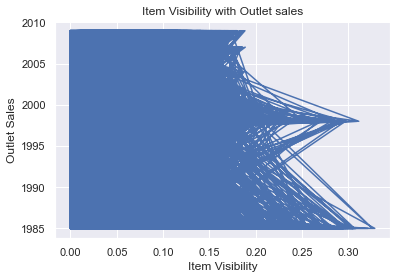

In [72]:
# bivariate analysis
plt.xlabel("Item Visibility")
plt.ylabel("Outlet Sales")
plt.title("Item Visibility with Outlet sales")
plt.plot(train.Item_Visibility, y)

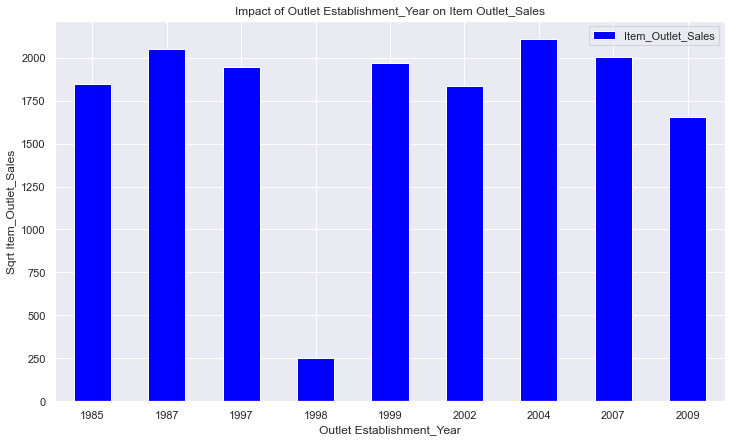

In [73]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot (kind='bar', color='blue', figsize=(12,7))
plt.xlabel ("Outlet Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet Establishment_Year on Item Outlet_Sales")
plt.xticks (rotation=0)
plt.show()

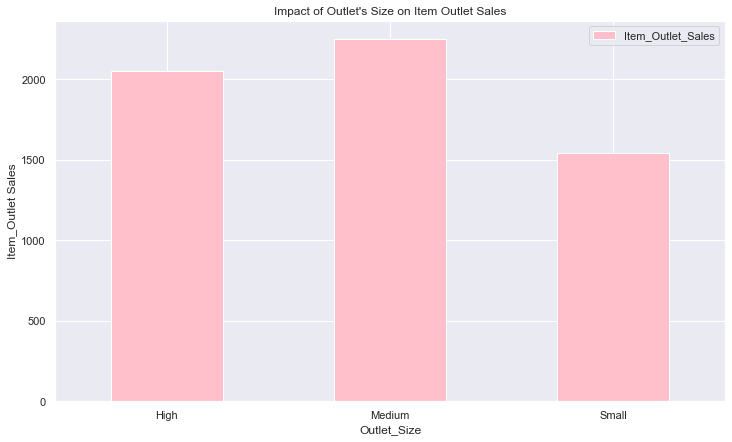

In [32]:
Item_Fat_Content_pivot = \
train.pivot_table (index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='pink', figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel ("Item_Outlet Sales")
plt.title ("Impact of Outlet's Size on Item Outlet Sales")
plt.xticks (rotation=0)
plt.show()

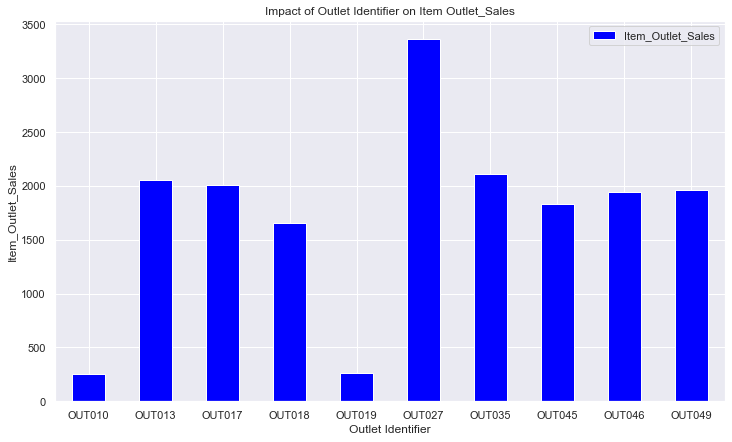

In [74]:
Outlet_Identifier_pivot = \
train.pivot_table (index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot (kind='bar', color='blue', figsize=(12,7))
plt.xlabel('Outlet Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet Identifier on Item Outlet_Sales')
plt.xticks (rotation=0)
plt.show()

In [76]:
from sklearn import preprocessing
X_scaled = preprocessing.StandardScaler().fit_transform(X_train.astype(float))
# y_scaled = preprocessing.StandardScaler().fit_transform(y.astype(float).values.reshape(-1,1))

from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split( X_scaled, y, test_size=0.2, random_state=4)

#knn

from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor(n_neighbors=6)
reg_knn.fit(X_train_s, y_train_s)
print(reg_knn.score(X_train_s,y_train_s))
print(reg_knn.score(X_test_s, y_test_s))

0.9990697859494795
0.9980885753530304


In [84]:
y_pred = reg_knn.predict(X_test_s)
y_true=  y_test_s
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)
# explained_variance_score(y_true, y_pred)

0.13431085043988425

In [85]:
result_knn = reg_knn.predict(X_test)

In [86]:
from sklearn import linear_model
regr_mlr = linear_model.LinearRegression()
regr_mlr.fit(X_train_s, y_train_s)
y_pred1 = regr_mlr.predict(X_test_s)
y_true1=  y_test_s
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true1, y_pred1)

1.752604083781708e-26

In [89]:
# Lasso_regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train_s, y_train_s)
# Lasso(alpha=0.1)
y_pred2 = clf.predict(X_test_s)
y_true2 =  y_test_s
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true2, y_pred2)

0.0652884217052867

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=6, random_state=1)
regr.fit(X_train_s, y_train_s)
y_pred3 = regr.predict(X_test_s)
y_true3 =  y_test_s
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true3, y_pred3)

0.14980344288633138